# Pymaceuticals Inc.
-Analysis by June Kimm from the University of Texas Boot camp

### Analysis

- Looking through the data, there was a equal distribution of mice and sample data. The data is very reliable as the only outlier seems 1 out of 2000 or so data points.

- Extrapolating the drug that greatly reduces last tumor size would be recommended to find the drug regime that most effectively reduced the Tumor size. 
 

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_results = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
combined_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice.
combined_results["Mouse ID"].value_counts()

g989    13
t451    10
l725    10
l733    10
j989    10
        ..
l872     1
x336     1
t573     1
o848     1
h428     1
Name: Mouse ID, Length: 249, dtype: int64

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_results.loc[combined_results.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

array(['g989'], dtype=object)

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_results.loc[combined_results["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_results = combined_results.loc[combined_results["Mouse ID"] != "g989"]
combined_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [15]:
# Checking the number of mice in the clean DataFrame.
combined_results["Mouse ID"].value_counts()

t451    10
l725    10
l733    10
j989    10
t198    10
        ..
f932     1
u153     1
n482     1
x226     1
d133     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [170]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
New_results=combined_results[["Drug Regimen", "Tumor Volume (mm3)"]]
index=combined_results["Drug Regimen"].unique()
Mean_Tumor_Volume=New_results.groupby("Drug Regimen").mean()
Median_Tumor_Volume=New_results.groupby("Drug Regimen").median()
Tumor_Volume_Variance=New_results.groupby("Drug Regimen").var()
Tumor_Volume_std=New_results.groupby("Drug Regimen").std()
Tumor_Volume_std_err=New_results.groupby("Drug Regimen").sem()

Summary_data=pd.DataFrame(index=index, columns={"Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Volume Std. Dev.", "Tumor Volume Std. Err."}, data={"Mean Tumor Volume": Mean_Tumor_Volume["Tumor Volume (mm3)"], "Median Tumor Volume": Median_Tumor_Volume["Tumor Volume (mm3)"], "Tumor Volume Variance": Tumor_Volume_Variance["Tumor Volume (mm3)"], "Tumor Volume Std. Dev.": Tumor_Volume_std["Tumor Volume (mm3)"], "Tumor Volume Std. Err.": Tumor_Volume_std_err["Tumor Volume (mm3)"]})
Summary_data

,Tumor Volume Variance,Median Tumor Volume,Tumor Volume Std. Dev.,Mean Tumor Volume,Tumor Volume Std. Err.
Ramicane,23.486704,40.673236,4.846308,40.216745,0.320955
Capomulin,24.947764,41.557809,4.994774,40.675741,0.329346
Infubinol,43.128684,51.820584,6.567243,52.884795,0.492236
Placebo,61.168083,52.288934,7.821003,54.033581,0.581331
Ceftamin,39.290177,51.776157,6.268188,52.591172,0.469821
Stelasyn,59.450562,52.431737,7.710419,54.233149,0.573111
Zoniferol,48.533355,51.818479,6.966589,53.236507,0.516398
Ketapril,68.553577,53.698743,8.279709,55.235638,0.603860
Propriva,42.351070,50.854632,6.507770,52.322552,0.512884
Naftisol,66.173479,52.509285,8.134708,54.331565,0.596466


In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
combined_results.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

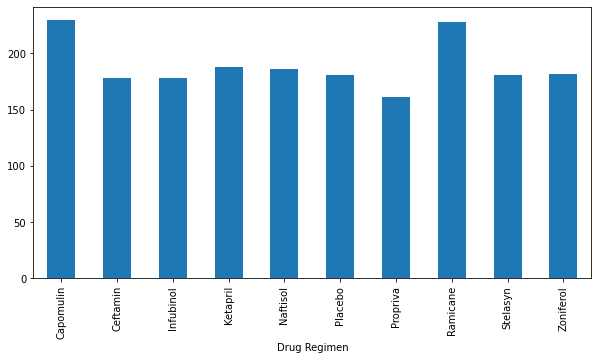

In [26]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
combined_results.groupby("Drug Regimen").count()["Timepoint"].plot(kind="bar", figsize=(10,5))



([<matplotlib.axis.XTick at 0x1f4306d2f08>,
 [Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Ceftamin'),
  Text(0, 0, 'Infubinol'),
  Text(0, 0, 'Ketapril'),
  Text(0, 0, 'Naftisol'),
  Text(0, 0, 'Placebo'),
  Text(0, 0, 'Propriva'),
  Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Stelasyn'),
  Text(0, 0, 'Zoniferol')])

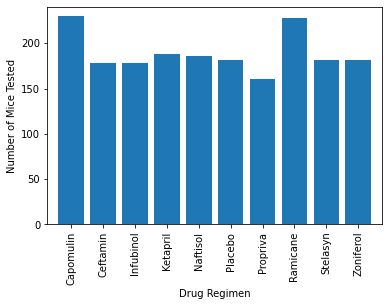

In [147]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(combined_results.groupby("Drug Regimen").count()["Timepoint"]))
y_axis= combined_results.groupby("Drug Regimen").count()["Timepoint"]
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+10)
plt.bar(x_axis, y_axis, align="center")
plt.xticks(tick_locations, list(combined_results.groupby("Drug Regimen").count()["Timepoint"].index), rotation="vertical")


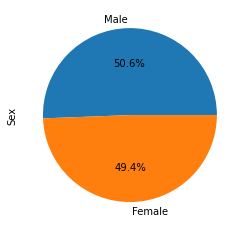

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
combined_results["Sex"].value_counts().plot(kind="pie", autopct="%1.1f%%")


In [56]:
combined_results["Sex"].value_counts()

Male      958
Female    935
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x1f42e7b5f48>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')],
 [Text(-0.01145045643959205, 0.5998907292560246, '50.6%'),
  Text(0.011450456439592244, -0.5998907292560246, '49.4%')])

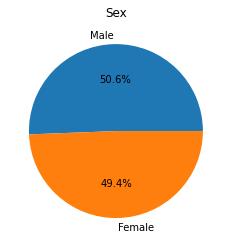

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Male", "Female"]
sizes=  [958, 935]
plt.title("Sex")
plt.pie(sizes, labels=labels, autopct="%1.1f%%")


## Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_volume = combined_results.groupby(["Mouse ID", "Drug Regimen"]).last()["Tumor Volume (mm3)"]
# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Final_combined_df= pd.merge(combined_results, final_tumor_volume, on=["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"])
Final_combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [99]:
# Put treatments into a list for for loop (and later for plot labels)
treatments= Final_combined_df["Drug Regimen"].unique()
print(treatments)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = Final_combined_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The interquartile range of final tumor volumes are: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
    
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_data.append(Final_combined_df.loc[Final_combined_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"])
tumor_vol_data




['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']
The interquartile range of final tumor volumes are: 19.022849680000007
Values below 17.400437649999986 could be outliers.
Values above 93.49183637000002 could be outliers.


[0     22.050126
 4     29.128472
 5     30.276232
 7     30.564625
 8     30.638696
 9     31.560470
 11    31.095335
 15    33.397653
 17    32.978522
 18    33.562402
 19    36.134852
 21    38.810366
 23    37.225650
 25    36.374510
 26    36.561652
 27    37.311236
 29    38.342008
 33    38.407618
 41    40.659006
 42    40.667713
 43    45.220869
 44    43.047543
 46    43.419381
 47    43.166373
 48    44.183451
 Name: Tumor Volume (mm3), dtype: float64,
 1      23.343598
 2      28.484033
 3      28.430964
 6      30.485985
 10     31.023923
 12     31.896238
 13     32.377357
 14     33.329098
 16     34.455298
 20     37.311846
 22     36.041047
 24     37.074024
 28     38.846876
 30     38.939633
 31     38.982878
 32     38.753265
 34     38.125164
 35     39.952347
 36     40.658124
 37     40.159220
 38     40.728578
 39     41.483008
 40     41.581521
 45     47.685963
 181    46.539206
 Name: Tumor Volume (mm3), dtype: float64,
 49     67.973419
 50     65.525743
 57

In [84]:
    # add subset 
Capomulin_volume = Final_combined_df.loc[Final_combined_df["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"]
Ramicane_volume = Final_combined_df.loc[Final_combined_df["Drug Regimen"] == "Ramicane", "Tumor Volume (mm3)"]
Infubinol_volume = Final_combined_df.loc[Final_combined_df["Drug Regimen"] == "Infubinol", "Tumor Volume (mm3)"]
Ceftamin_volume = Final_combined_df.loc[Final_combined_df["Drug Regimen"] == "Ceftamin", "Tumor Volume (mm3)"]
    # Determine outliers using upper and lower bounds
Capomuline_outlier= Capomulin_volume.loc[(Capomulin_volume < lower_bound) | (Capomulin_volume > upper_bound)]
Ramicane_outlier= Ramicane_volume.loc[(Ramicane_volume < lower_bound) | (Ramicane_volume > upper_bound)]
Infubinol_outlier= Infubinol_volume.loc[(Infubinol_volume < lower_bound) | (Infubinol_volume > upper_bound)]
Ceftamin_outlier= Ceftamin_volume.loc[(Ceftamin_volume < lower_bound) | (Ceftamin_volume > upper_bound)]
print(f"Capomilin's potential outlier: {Capomuline_outlier}")
print(f"Ramicane's potential outlier: {Ramicane_outlier}")
print(f"Infubinol's potential outlier: {Infubinol_outlier}")
print(f"Ceftamin potential outlier: {Ceftamin_outlier}")


Capomilin's potential outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin potential outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)


ValueError: too many values to unpack (expected 2)

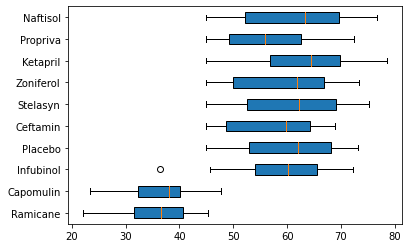

In [125]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.boxplot(tumor_vol_data, labels=treatments, patch_artist=True, vert=False)

plt.show()



## Line and Scatter Plots

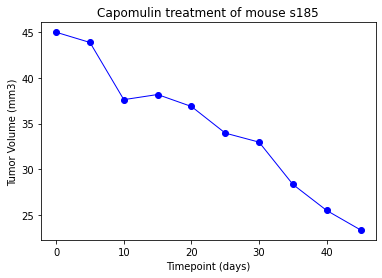

In [130]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
time= combined_results.loc[combined_results["Mouse ID"] == "s185", "Timepoint"]
Tumor_vol= combined_results.loc[combined_results["Mouse ID"] == "s185", "Tumor Volume (mm3)"]

plt.plot(time, Tumor_vol, marker="o", color="blue", linewidth=1)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse s185")
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

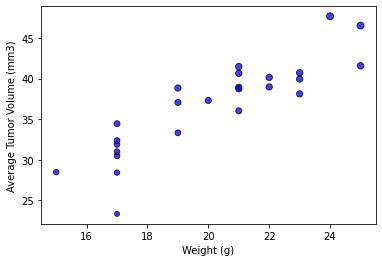

In [139]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor_vol=Final_combined_df.loc[Final_combined_df["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"]
mouse_weight= Final_combined_df.loc[Final_combined_df["Drug Regimen"] == "Capomulin", "Weight (g)"]

plt.scatter(mouse_weight, avg_tumor_vol, marker="o", facecolors="blue", edgecolors="black", s=avg_tumor_vol, alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


## Correlation and Regression

The r-squared is: 0.7686134812139


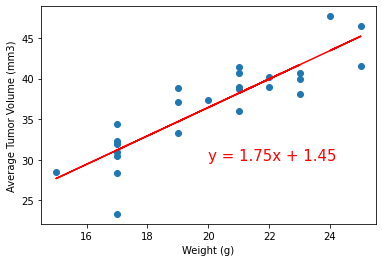

In [142]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress
x_values = mouse_weight
y_values = avg_tumor_vol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()